In [28]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

In [2]:
train_ds = pd.read_csv("nlp-getting-started/encoded_train.csv", index_col=False)
test_ds = pd.read_csv("nlp-getting-started/encoded_test.csv", index_col=False)

In [3]:
train_ds = np.array(train_ds)
test_ds = np.array(test_ds)

In [4]:
train_data, val_data = train_test_split(train_ds, test_size=0.2)

In [5]:
train_target = train_data[:, -1]
train_features = train_data[:, :-1]
val_target = val_data[:, -1]
val_features = val_data[:, :-1]
test_features = test_ds

# Dimensionality Reduction

In [6]:
pca_200 = PCA(n_components=200)
pca_100 = PCA(n_components=100)
pca_10 = PCA(n_components=10)
pca_2 = PCA(n_components=2)

In [7]:
pca_200.fit(train_features)
pca_100.fit(train_features)
pca_10.fit(train_features)
pca_2.fit(train_features);

In [8]:
train_features_200 = pca_200.transform(train_features)
train_features_100 = pca_100.transform(train_features)
train_features_10 = pca_10.transform(train_features)
train_features_2 = pca_2.transform(train_features)

val_features_200 = pca_200.transform(val_features)
val_features_100 = pca_100.transform(val_features)
val_features_10 = pca_10.transform(val_features)
val_features_2 = pca_2.transform(val_features)

test_features_200 = pca_200.transform(test_features)
test_features_100 = pca_100.transform(test_features)
test_features_10 = pca_10.transform(test_features)
test_features_2 = pca_2.transform(test_features)

Just a plot to see the PCA with 2 components

In [56]:
train_features_2.shape, train_target.shape

((5176, 2), (5176,))

In [9]:
Z_0 = train_features_2[np.argwhere(train_target.reshape(-1) == 0)].reshape(-1, 2)
Z_1 = train_features_2[np.argwhere(train_target.reshape(-1) == 1)].reshape(-1, 2)

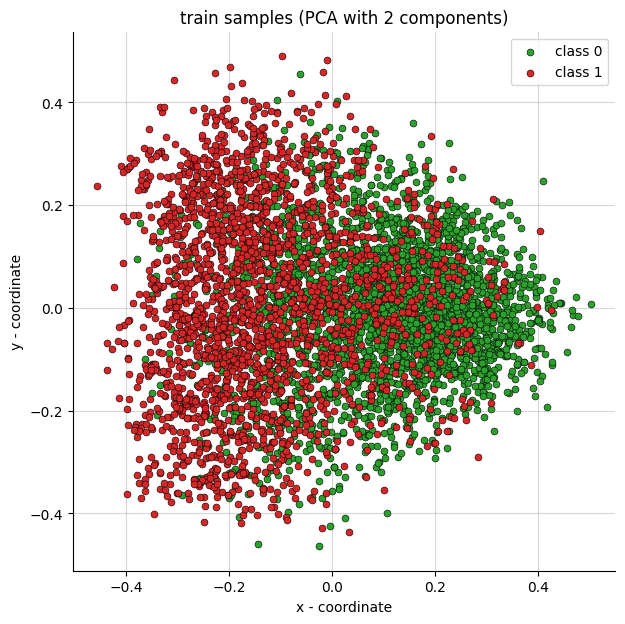

In [20]:
plt.rcParams['figure.figsize']=7, 7
fig = plt.figure()

ax = fig.add_subplot(111)

ax.scatter(Z_0[:, 0], Z_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=25, label="class 0")
ax.scatter(Z_1[:, 0], Z_1[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=25, label="class 1")
ax.set_xlabel("x - coordinate", fontsize=10)
ax.set_ylabel("y - coordinate", fontsize=10)
ax.set_title("train samples (PCA with 2 components)", fontsize=12)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.show()

# Let's start with the classification methods

We are going to start with the most basic ones and then the most complex ones

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [24]:
logistic_regression_full = LogisticRegression(penalty="l2")
logistic_regression_200 = LogisticRegression(penalty="l2")
logistic_regression_100 = LogisticRegression(penalty="l2")
logistic_regression_10 = LogisticRegression(penalty="l2")
logistic_regression_2 = LogisticRegression(penalty="l2");

In [26]:
logistic_regression_full.fit(train_features, train_target)
logistic_regression_200.fit(train_features_200, train_target)
logistic_regression_100.fit(train_features_100, train_target)
logistic_regression_10.fit(train_features_10, train_target)
logistic_regression_2.fit(train_features_2, train_target);

In [45]:
predict_train_full = logistic_regression_full.predict(train_features)
predict_val_full = logistic_regression_full.predict(val_features)
print(f"Train Full Model: Accuracy: {round(accuracy_score(train_target, predict_train_full), 4)} F1: {round(f1_score(train_target, predict_train_full), 4)}")
print(f"Validation Full Model: Accuracy: {round(accuracy_score(val_target, predict_val_full), 4)} F1: {round(f1_score(val_target, predict_val_full), 4)}\n")

predict_train_200 = logistic_regression_200.predict(train_features_200)
predict_val_200 = logistic_regression_200.predict(val_features_200)
print(f"Train 200 Model: Accuracy: {round(accuracy_score(train_target, predict_train_200), 4)} F1: {round(f1_score(train_target, predict_train_200), 4)}")
print(f"Validation 200 Model: Accuracy: {round(accuracy_score(val_target, predict_val_200), 4)} F1: {round(f1_score(val_target, predict_val_200), 4)}\n")

predict_train_100 = logistic_regression_100.predict(train_features_100)
predict_val_100 = logistic_regression_100.predict(val_features_100)
print(f"Train 100 Model: Accuracy: {round(accuracy_score(train_target, predict_train_100), 4)} F1: {round(f1_score(train_target, predict_train_100), 4)}")
print(f"Validation 100 Model: Accuracy: {round(accuracy_score(val_target, predict_val_100), 4)} F1: {round(f1_score(val_target, predict_val_100), 4)}\n")

predict_train_10 = logistic_regression_10.predict(train_features_10)
predict_val_10 = logistic_regression_10.predict(val_features_10)
print(f"Train 10 Model: Accuracy: {round(accuracy_score(train_target, predict_train_10), 4)} F1: {round(f1_score(train_target, predict_train_10), 4)}")
print(f"Validation 10 Model: Accuracy: {round(accuracy_score(val_target, predict_val_10), 4)} F1: {round(f1_score(val_target, predict_val_10), 4)}\n")

predict_train_2 = logistic_regression_2.predict(train_features_2)
predict_val_2 = logistic_regression_2.predict(val_features_2)
print(f"Train 2 Model: Accuracy: {round(accuracy_score(train_target, predict_train_2), 4)} F1: {round(f1_score(train_target, predict_train_2), 4)}")
print(f"Validation 2 Model: Accuracy: {round(accuracy_score(val_target, predict_val_2), 4)} F1: {round(f1_score(val_target, predict_val_2), 4)}\n")

Train Full Model: Accuracy: 0.8346 F1: 0.8016
Validation Full Model: Accuracy: 0.8208 F1: 0.7795

Train 200 Model: Accuracy: 0.8281 F1: 0.7933
Validation 200 Model: Accuracy: 0.8139 F1: 0.7724

Train 100 Model: Accuracy: 0.8232 F1: 0.7884
Validation 100 Model: Accuracy: 0.8193 F1: 0.7776

Train 10 Model: Accuracy: 0.8064 F1: 0.7695
Validation 10 Model: Accuracy: 0.8062 F1: 0.763

Train 2 Model: Accuracy: 0.7888 F1: 0.7513
Validation 2 Model: Accuracy: 0.7737 F1: 0.7269



## KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn_full = KNeighborsClassifier(n_neighbors=20)
knn_200 = KNeighborsClassifier(n_neighbors=20)
knn_100 = KNeighborsClassifier(n_neighbors=20)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_2 = KNeighborsClassifier(n_neighbors=5);

In [51]:
knn_full.fit(train_features, train_target)
knn_200.fit(train_features_200, train_target)
knn_100.fit(train_features_100, train_target)
knn_10.fit(train_features_10, train_target)
knn_2.fit(train_features_2, train_target);

In [53]:
predict_train_full = knn_full.predict(train_features)
predict_val_full = knn_full.predict(val_features)
print(f"Train Full Model: Accuracy: {round(accuracy_score(train_target, predict_train_full), 4)} F1: {round(f1_score(train_target, predict_train_full), 4)}")
print(f"Validation Full Model: Accuracy: {round(accuracy_score(val_target, predict_val_full), 4)} F1: {round(f1_score(val_target, predict_val_full), 4)}\n")

predict_train_200 = knn_200.predict(train_features_200)
predict_val_200 = knn_200.predict(val_features_200)
print(f"Train 200 Model: Accuracy: {round(accuracy_score(train_target, predict_train_200), 4)} F1: {round(f1_score(train_target, predict_train_200), 4)}")
print(f"Validation 200 Model: Accuracy: {round(accuracy_score(val_target, predict_val_200), 4)} F1: {round(f1_score(val_target, predict_val_200), 4)}\n")

predict_train_100 = knn_100.predict(train_features_100)
predict_val_100 = knn_100.predict(val_features_100)
print(f"Train 100 Model: Accuracy: {round(accuracy_score(train_target, predict_train_100), 4)} F1: {round(f1_score(train_target, predict_train_100), 4)}")
print(f"Validation 100 Model: Accuracy: {round(accuracy_score(val_target, predict_val_100), 4)} F1: {round(f1_score(val_target, predict_val_100), 4)}\n")

predict_train_10 = knn_10.predict(train_features_10)
predict_val_10 = knn_10.predict(val_features_10)
print(f"Train 10 Model: Accuracy: {round(accuracy_score(train_target, predict_train_10), 4)} F1: {round(f1_score(train_target, predict_train_10), 4)}")
print(f"Validation 10 Model: Accuracy: {round(accuracy_score(val_target, predict_val_10), 4)} F1: {round(f1_score(val_target, predict_val_10), 4)}\n")

predict_train_2 = knn_2.predict(train_features_2)
predict_val_2 = knn_2.predict(val_features_2)
print(f"Train 2 Model: Accuracy: {round(accuracy_score(train_target, predict_train_2), 4)} F1: {round(f1_score(train_target, predict_train_2), 4)}")
print(f"Validation 2 Model: Accuracy: {round(accuracy_score(val_target, predict_val_2), 4)} F1: {round(f1_score(val_target, predict_val_2), 4)}\n")

Train Full Model: Accuracy: 0.8155 F1: 0.7925
Validation Full Model: Accuracy: 0.7869 F1: 0.7587

Train 200 Model: Accuracy: 0.8246 F1: 0.7964
Validation 200 Model: Accuracy: 0.8062 F1: 0.7704

Train 100 Model: Accuracy: 0.8338 F1: 0.7974
Validation 100 Model: Accuracy: 0.8116 F1: 0.7658

Train 10 Model: Accuracy: 0.8385 F1: 0.7938
Validation 10 Model: Accuracy: 0.8108 F1: 0.7557

Train 2 Model: Accuracy: 0.8284 F1: 0.7937
Validation 2 Model: Accuracy: 0.7614 F1: 0.7037



## Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree_full = DecisionTreeClassifier(max_depth=8)
tree_200 = DecisionTreeClassifier(max_depth=8)
tree_100 = DecisionTreeClassifier(max_depth=8)
tree_10 = DecisionTreeClassifier(max_depth=8)
tree_2 = DecisionTreeClassifier(max_depth=8);

In [71]:
tree_full.fit(train_features, train_target)
tree_200.fit(train_features_200, train_target)
tree_100.fit(train_features_100, train_target)
tree_10.fit(train_features_10, train_target)
tree_2.fit(train_features_2, train_target);

In [72]:
predict_train_full = tree_full.predict(train_features)
predict_val_full = tree_full.predict(val_features)
print(f"Train Full Model: Accuracy: {round(accuracy_score(train_target, predict_train_full), 4)} F1: {round(f1_score(train_target, predict_train_full), 4)}")
print(f"Validation Full Model: Accuracy: {round(accuracy_score(val_target, predict_val_full), 4)} F1: {round(f1_score(val_target, predict_val_full), 4)}\n")

predict_train_200 = tree_200.predict(train_features_200)
predict_val_200 = tree_200.predict(val_features_200)
print(f"Train 200 Model: Accuracy: {round(accuracy_score(train_target, predict_train_200), 4)} F1: {round(f1_score(train_target, predict_train_200), 4)}")
print(f"Validation 200 Model: Accuracy: {round(accuracy_score(val_target, predict_val_200), 4)} F1: {round(f1_score(val_target, predict_val_200), 4)}\n")

predict_train_100 = tree_100.predict(train_features_100)
predict_val_100 = tree_100.predict(val_features_100)
print(f"Train 100 Model: Accuracy: {round(accuracy_score(train_target, predict_train_100), 4)} F1: {round(f1_score(train_target, predict_train_100), 4)}")
print(f"Validation 100 Model: Accuracy: {round(accuracy_score(val_target, predict_val_100), 4)} F1: {round(f1_score(val_target, predict_val_100), 4)}\n")

predict_train_10 = tree_10.predict(train_features_10)
predict_val_10 = tree_10.predict(val_features_10)
print(f"Train 10 Model: Accuracy: {round(accuracy_score(train_target, predict_train_10), 4)} F1: {round(f1_score(train_target, predict_train_10), 4)}")
print(f"Validation 10 Model: Accuracy: {round(accuracy_score(val_target, predict_val_10), 4)} F1: {round(f1_score(val_target, predict_val_10), 4)}\n")

predict_train_2 = tree_2.predict(train_features_2)
predict_val_2 = tree_2.predict(val_features_2)
print(f"Train 2 Model: Accuracy: {round(accuracy_score(train_target, predict_train_2), 4)} F1: {round(f1_score(train_target, predict_train_2), 4)}")
print(f"Validation 2 Model: Accuracy: {round(accuracy_score(val_target, predict_val_2), 4)} F1: {round(f1_score(val_target, predict_val_2), 4)}\n")

Train Full Model: Accuracy: 0.8934 F1: 0.8723
Validation Full Model: Accuracy: 0.7282 F1: 0.6704

Train 200 Model: Accuracy: 0.8934 F1: 0.8701
Validation 200 Model: Accuracy: 0.7815 F1: 0.7297

Train 100 Model: Accuracy: 0.8785 F1: 0.8533
Validation 100 Model: Accuracy: 0.7861 F1: 0.7344

Train 10 Model: Accuracy: 0.8667 F1: 0.8319
Validation 10 Model: Accuracy: 0.7846 F1: 0.7179

Train 2 Model: Accuracy: 0.8199 F1: 0.7842
Validation 2 Model: Accuracy: 0.7514 F1: 0.6933



In [58]:
tree_full.get_depth()

49